In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ready.outcome1.csv to ready.outcome1.csv


In [ ]:
import pandas as pd
import io

outcome1 = pd.read_csv(io.BytesIO(uploaded['ready.outcome1.csv']))
print(outcome1)

       v000  v007  v012  v013  v025  v106  v190  \
0       NG7  2018    40     6     1     4     5   
1       NG7  2018    37     5     1     4     5   
2       NG7  2018    27     3     1     4     5   
3       NG7  2018    27     3     1     3     5   
4       NG7  2018    24     2     1     3     5   
...     ...   ...   ...   ...   ...   ...   ...   
120648  ZW7  2015    39     5     0     2     3   
120649  ZW7  2015    32     4     0     3     3   
120650  ZW7  2015    24     2     0     2     2   
120651  ZW7  2015    40     6     0     2     3   
120652  ZW7  2015    40     6     0     2     3   

                                       v501      v501a             v501b  ...  \
0                       living with partner  Unmarried     Never married  ...   
1                                   married    Married           Married  ...   
2                                   married    Married           Married  ...   
3                                   married    Married         

In [ ]:
from sklearn.model_selection import train_test_split
outcome1_train, outcome1_test = train_test_split(
outcome1, test_size=0.20, stratify=outcome1[['v000', 'child_loss']])

x_train = outcome1_train[['v000_AO7', 'v000_EG6', 'v000_ET7', 'v000_GA6', 'v000_GH6', 'v000_KE6', 'v000_ML7', 'v000_NG7', 'v000_ZA7', 
                          'v000_ZM7', 'v000_ZW7', 'v013', 'v025', 'v106', 'v190', 'v501b_Formerly married', 'v501b_Married', 
                          'v501b_Never married', 'first.sex', 'v228', 'smoke']]
y_train = outcome1_train['lost_child']
y2_train = outcome1_train['child_loss']


x_test = outcome1_test[['v000_AO7', 'v000_EG6', 'v000_ET7', 'v000_GA6', 'v000_GH6', 'v000_KE6', 'v000_ML7', 'v000_NG7', 'v000_ZA7', 
                          'v000_ZM7', 'v000_ZW7', 'v013', 'v025', 'v106', 'v190', 'v501b_Formerly married', 'v501b_Married', 
                          'v501b_Never married', 'first.sex', 'v228', 'smoke']]
y_test = outcome1_test['lost_child']
y2_test = outcome1_test['child_loss']

In [ ]:
print(outcome1_train.shape, outcome1_test.shape)

print(x_train.shape, x_test.shape)

(96522, 33) (24131, 33)
(96522, 21) (24131, 21)


Logistic: ROC AUC=0.743


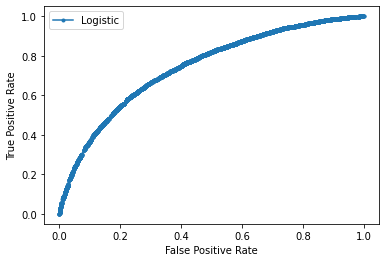

In [ ]:
# roc curve and auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y2_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y2_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y2_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_train_accuracy = []
knn_test_accuracy = []

knn_train2_accuracy = []
knn_test2_accuracy = []

neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf2 = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    clf2.fit(x_train, y2_train)

    knn_train_accuracy.append(clf.score(x_train, y_train))
    knn_test_accuracy.append(clf.score(x_test, y_test))

    knn_train2_accuracy.append(clf.score(x_train, y2_train))
    knn_test2_accuracy.append(clf.score(x_test, y2_test))


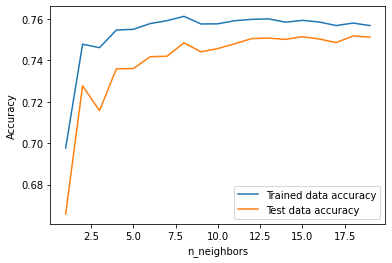

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, knn_train_accuracy, label= "Trained data accuracy")
plt.plot(neighbors_settings, knn_test_accuracy, label= "Test data accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


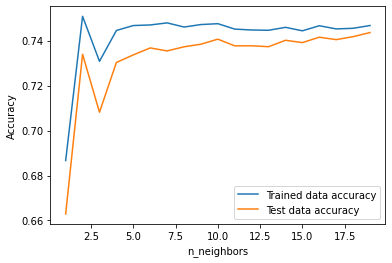

In [ ]:
plt.plot(neighbors_settings, knn_train2_accuracy, label= "Trained data accuracy")
plt.plot(neighbors_settings, knn_test2_accuracy, label= "Test data accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
print (knn_train_accuracy)

print (knn_train2_accuracy)

[0.6977580240774124, 0.7478087897059738, 0.7461614968608193, 0.7546776900602972, 0.7550092206957999, 0.7577857897681357, 0.7591844346366632, 0.7612772217732745, 0.757588943453306, 0.7576718261121816, 0.7591740743043037, 0.7598164149105904, 0.760054702554858, 0.7584592113715009, 0.7593294792896956, 0.7585317336980171, 0.7568222788587058, 0.7580240774124034, 0.7568222788587058]
[0.686672468452788, 0.75077184476078, 0.7307764033070181, 0.7444831230185864, 0.7466795134787924, 0.746938521787779, 0.747860591367771, 0.7460164522077868, 0.7471146474378898, 0.7475083400675494, 0.7450943826277947, 0.7447006899981351, 0.7445763660098216, 0.7458817678871138, 0.744338078365554, 0.7465966308199167, 0.7451772652866704, 0.7454569942603759, 0.7466898738111518]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model = MultinomialNB()
model.fit(x_train, y_train)
labels = model.predict(x_test)
nb_train_accuracy = []
nb_test_accuracy = []
nb_train_accuracy.append(model.score(x_train, y_train))
nb_test_accuracy.append(model.score(x_test, y_test))
print(nb_train_accuracy, nb_test_accuracy)


model_2 = MultinomialNB()
model_2.fit(x_train, y2_train)
labels_2 = model_2.predict(x_test)
nb2_train_accuracy = []
nb2_test_accuracy = []
nb2_train_accuracy.append(model_2.score(x_train, y2_train))
nb2_test_accuracy.append(model_2.score(x_test, y2_test))
print(nb2_train_accuracy, nb2_test_accuracy)

cv_train = cross_val_score(model, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(model, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(model_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(model_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(model, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(model_2, x_test, y2_test, cv=10)

accuracy = pd.DataFrame()
accuracy2 = pd.DataFrame()

accuracy = accuracy.append([["Naive Baye's", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Naive Baye's", (cv_train2.mean()), (cv_test2.mean())]])

[0.7540975114481673] [0.7543823297832664]
[0.7703425125878038] [0.7687621731382869]
Percent accuracy within each fold (First): 

[0.75240858 0.75479126 0.75310816 0.75300456 0.75663075 0.75290095
 0.75476585 0.75435143 0.75486946 0.7538334 ] 
 [0.75144988 0.75093245 0.75631993 0.75300456 0.75549109 0.75714878
 0.75549109 0.75259014 0.75300456 0.7538334 ]

Mean & SD accuracy: 

0.7540664401177554 0.7539265872409563
0.0012051280451909068 0.0019899742075337387

Percent accuracy within each fold (Second): 

[0.76898374 0.77105563 0.76543722 0.77186075 0.77289681 0.77092831
 0.77134273 0.76864898 0.77020307 0.77175715] 
 [0.76677713 0.76336511 0.7708247  0.76916701 0.77786987 0.76543722
 0.77414007 0.76253626 0.76460837 0.76875259]

Mean & SD accuracy: 

0.7703114376360753 0.7683478335212023
0.0020363900774159243 0.004633716958841678


Naive Bayes: ROC AUC=0.729


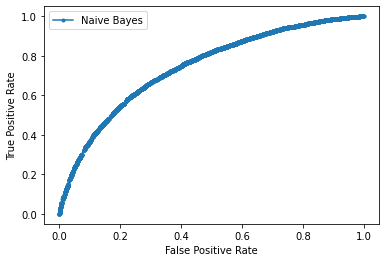

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# fit a model
model_2 = MultinomialNB()
model_2.fit(x_train, y2_train)
# predict probabilities
nb_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]
# calculate scores
nb_auc = roc_auc_score(y2_test, nb_probs)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
nb_fpr, nb_tpr, _ = roc_curve(y2_test, nb_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
labels_tree = tree.predict(x_test)

tree_2 = DecisionTreeClassifier(random_state=0)
tree_2.fit(x_train, y2_train)
labels_tree2 = tree_2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

print("Accuracy on training set: {:.3f}".format(tree_2.score(x_train, y2_train)))
print("Accuracy on test set: {:.3f}".format(tree_2.score(x_test, y2_test)))

cv_train = cross_val_score(tree, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(tree, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(tree_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(tree_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(tree, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(tree_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["Decision Tree (Entropy)", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Decision Tree (Entropy)", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.786
Accuracy on test set: 0.754
Accuracy on training set: 0.806
Accuracy on test set: 0.773
Percent accuracy within each fold (First): 

[0.75044028 0.75427328 0.75321177 0.75145048 0.75393701 0.7538334
 0.75393701 0.75082884 0.75238293 0.75435143] 
 [0.73363712 0.73518442 0.71653543 0.72689598 0.72813925 0.74264401
 0.72440945 0.7273104  0.73062578 0.7273104 ]

Mean & SD accuracy: 

0.7528646424206326 0.7292692234928795
0.0014073972366819359 0.0065965379951465125

Percent accuracy within each fold (Second): 

[0.77250596 0.77240236 0.77154994 0.7708247  0.7745545  0.77393286
 0.77496892 0.77310402 0.76978864 0.77186075] 
 [0.75476388 0.74595939 0.74015748 0.75341898 0.75093245 0.76004973
 0.74513054 0.74513054 0.75134687 0.74678823]

Mean & SD accuracy: 

0.7725492653510293 0.7493678092052474
0.0015552839454131431 0.005522756117813724


Decision Tree: ROC AUC=0.758


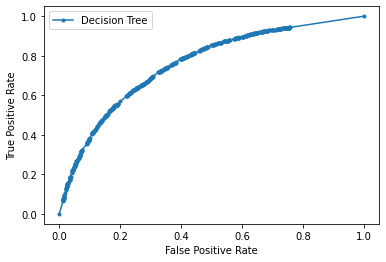

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

# fit a model
model_2 = DecisionTreeClassifier(random_state=0)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
clf_gini.fit(x_train, y_train)
labels_gini = clf_gini.predict(x_test)

clf_gini2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
clf_gini2.fit(x_train, y2_train)
labels_gini2 = clf_gini2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(clf_gini.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_gini.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(clf_gini2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(clf_gini2.score(x_test, y2_test)))

cv_train = cross_val_score(clf_gini, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(clf_gini, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(clf_gini2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(clf_gini2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(clf_gini, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(clf_gini2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["Decision Tree (Gini)", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Decision Tree (Gini)", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.761
Accuracy on test set: 0.755
Accuracy on training set (Child loss): 0.778
Accuracy on test set (Child loss): 0.770
Percent accuracy within each fold (First): 

[0.75282296 0.75675956 0.75663075 0.75393701 0.75466225 0.75714878
 0.75476585 0.75393701 0.7555947  0.7576668 ] 
 [0.76056338 0.74968918 0.74305843 0.75549109 0.75051803 0.75010361
 0.74222959 0.74720265 0.74554496 0.74554496]

Mean & SD accuracy: 

0.755392565452619 0.7489945891678292
0.0015318416924185215 0.005367389578657666

Percent accuracy within each fold (Second): 

[0.77126282 0.77302393 0.76968504 0.77134273 0.77393286 0.77776627
 0.77092831 0.76875259 0.76989225 0.77331123] 
 [0.77050539 0.76750932 0.7443017  0.77952756 0.76668048 0.76460837
 0.75631993 0.76295068 0.76502279 0.75673436]

Mean & SD accuracy: 

0.7719898022508265 0.7634160586247305
0.0024944699016082104 0.008954490148631243


Decision Tree: ROC AUC=0.745


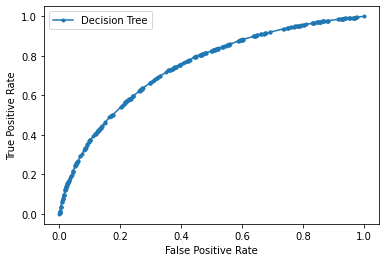

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

# fit a model
model_2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
labels_rf = forest.predict(x_test)

forest_2 = RandomForestClassifier(n_estimators=100, random_state=0)
forest_2.fit(x_train, y2_train)
labels_rf2 = forest.predict(x_test)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(forest_2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(forest_2.score(x_test, y2_test)))

cv_train = cross_val_score(forest, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(forest, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(forest_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(forest_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(forest, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(forest_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["Random Forest", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Random Forest", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.786
Accuracy on test set: 0.755
Accuracy on training set (Child loss): 0.806
Accuracy on test set (Child loss): 0.773
Percent accuracy within each fold (First): 

[0.7518906  0.75675956 0.75486946 0.75290095 0.75497306 0.75486946
 0.75663075 0.75300456 0.75642354 0.75414422] 
 [0.74316487 0.73684211 0.73186904 0.7310402  0.73559884 0.75341898
 0.73435557 0.73352673 0.73642768 0.73352673]

Mean & SD accuracy: 

0.7546466157256468 0.7369770756373153
0.001592367488739728 0.006347166156062973

Percent accuracy within each fold (Second): 

[0.77074485 0.77426707 0.77041028 0.77020307 0.77673021 0.77755906
 0.77818069 0.77507252 0.77527973 0.77175715] 
 [0.75724938 0.74761707 0.75051803 0.76212184 0.75217571 0.76419395
 0.74968918 0.75176129 0.75176129 0.74968918]

Mean & SD accuracy: 

0.7740204619569686 0.7536776937679808
0.002887619475658153 0.005317746940072504


Decision Tree: ROC AUC=0.766


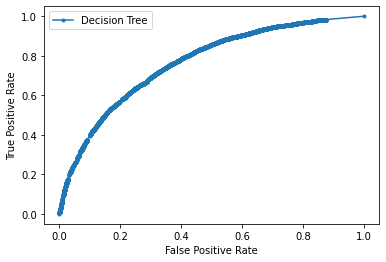

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

# fit a model
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth = 10)
gbrt.fit(x_train, y_train)
labels_gbrt = gbrt.predict(x_test)

gbrt_2 = GradientBoostingClassifier(random_state=0, max_depth = 10)
gbrt_2.fit(x_train, y2_train)
labels_gbrt2 = gbrt_2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(gbrt_2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(gbrt_2.score(x_test, y2_test)))

cv_train = cross_val_score(gbrt, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(gbrt, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(gbrt_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(gbrt_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(gbrt, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(gbrt_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["Gradient Boost", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Gradient Boost", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.782
Accuracy on test set: 0.758
Accuracy on training set (Child loss): 0.798
Accuracy on test set (Child loss): 0.774
Percent accuracy within each fold (First): 

[0.75479126 0.75945302 0.75880646 0.75528388 0.75714878 0.7595317
 0.7595317  0.75549109 0.75787402 0.75797762] 
 [0.73943662 0.74222959 0.73228346 0.73518442 0.73849979 0.74844592
 0.73062578 0.74098632 0.73974306 0.73477   ]

Mean & SD accuracy: 

0.7575889531260217 0.7382204957886565
0.0017456579478918016 0.0049619438942587885

Percent accuracy within each fold (Second): 

[0.77374909 0.77654615 0.77289681 0.7727932  0.77911314 0.78201409
 0.77704103 0.77445089 0.77486531 0.77807708] 
 [0.76636288 0.76626606 0.75466225 0.76336511 0.75507667 0.76792375
 0.75507667 0.75839204 0.76170742 0.75466225]

Mean & SD accuracy: 

0.776154679908361 0.7603495083761633
0.0028281639056204184 0.0051342023407811325


Decision Tree: ROC AUC=0.769


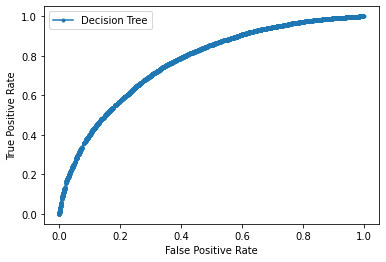

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingClassifier

# fit a model
model_2 = GradientBoostingClassifier(random_state=0, max_depth = 10)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
labels_svc = svc.predict(x_test)

svc_2 = SVC()
svc_2.fit(x_train, y2_train)
labels_svc2 = svc_2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(svc_2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(svc_2.score(x_test, y2_test)))

cv_train = cross_val_score(svc, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(svc, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(svc_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(svc_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(svc, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(svc_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["SVM", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["SVM", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.755
Accuracy on test set: 0.755
Accuracy on training set (Child loss): 0.769
Accuracy on test set (Child loss): 0.768


NameError: ignored

In [ ]:
cv_train = cross_val_score(svc, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(svc, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(svc_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(svc_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(svc, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(svc_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["SVM", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["SVM", (cv_train2.mean()), (cv_test2.mean())]])

Percent accuracy within each fold (First): 

[0.75427328 0.75530923 0.75435143 0.75528388 0.75528388 0.75590551
 0.75600912 0.75507667 0.75777041 0.75497306] 
 [0.75144988 0.75217571 0.75217571 0.75259014 0.75176129 0.75341898
 0.75300456 0.75134687 0.75259014 0.75217571]

Mean & SD accuracy: 

0.7554236470937297 0.752268899715055
0.0009450310292319527 0.0006224884138372644

Percent accuracy within each fold (Second): 

[0.7677406  0.76680825 0.76844177 0.76719851 0.77206797 0.76792375
 0.76906341 0.76875259 0.76947783 0.76989225] 
 [0.76594863 0.75839204 0.77248239 0.7670949  0.77041028 0.76626606
 0.76999586 0.76336511 0.76295068 0.76585164]

Mean & SD accuracy: 

0.768736691371271 0.7662757584486957
0.0014461655059533117 0.003899930540227518


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.svm import SVC

# fit a model
model_2 = SVC()
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

AttributeError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf = KNeighborsClassifier(n_neighbors = 8)
clf2 = KNeighborsClassifier(n_neighbors = 2)
clf.fit(x_train, y_train)
clf2.fit(x_train, y2_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(clf2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(clf2.score(x_test, y2_test)))

cv_train = cross_val_score(clf, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(clf, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(clf2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(clf2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())


cv_labels = cross_val_predict(clf, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(clf2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["KNN", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["KNN", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.759
Accuracy on test set: 0.748
Accuracy on training set (Child loss): 0.775
Accuracy on test set (Child loss): 0.758
Percent accuracy within each fold (First): 

[0.74484616 0.73572982 0.73767095 0.74181517 0.74316204 0.74823871
 0.74005387 0.74564857 0.74254041 0.74088272] 
 [0.74606462 0.7405719  0.74140075 0.74264401 0.75217571 0.74388728
 0.74761707 0.74595939 0.7405719  0.74264401]

Mean & SD accuracy: 

0.7420588419396318 0.7443536649555311
0.0035364894759353153 0.003474572792013889

Percent accuracy within each fold (Second): 

[0.7518906  0.74743603 0.7555947  0.7537298  0.75580191 0.75435143
 0.75145048 0.7594281  0.75528388 0.75300456] 
 [0.74606462 0.75051803 0.7480315  0.74595939 0.75051803 0.75134687
 0.75922089 0.74098632 0.74388728 0.74720265]

Mean & SD accuracy: 

0.7537971474654559 0.748373557205842
0.0030284279033088975 0.004722795807931974


NameError: ignored